In [127]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn import metrics


Problem 1: Linear Regression


You are hired by a company Gem Stones co ltd, which is a cubic zirconia manufacturer. You are provided with the dataset containing the prices and other attributes of almost 27,000 cubic zirconia (which is an inexpensive diamond alternative with many of the same qualities as a diamond). The company is earning different profits on different prize slots. You have to help the company in predicting the price for the stone on the bases of the details given in the dataset so it can distinguish between higher profitable stones and lower profitable stones so as to have better profit share. Also, provide them with the best 5 attributes that are most important.

In [134]:
data = pd.read_csv("cubic_zirconia.csv")
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [135]:
#Dropping columns
data = data.drop(["Unnamed: 0","x","y","z"],axis = 1)

In [136]:
data.head()

,carat,cut,color,clarity,depth,table,price
0,0.30,Ideal,E,SI1,62.1,58.0,499
1,0.33,Premium,G,IF,60.8,58.0,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6289
3,0.42,Ideal,F,VS1,61.6,56.0,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,779


In [137]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26967 non-null  float64
 1   cut      26967 non-null  object 
 2   color    26967 non-null  object 
 3   clarity  26967 non-null  object 
 4   depth    26270 non-null  float64
 5   table    26967 non-null  float64
 6   price    26967 non-null  int64  
dtypes: float64(3), int64(1), object(3)
memory usage: 1.4+ MB


In [138]:
# Are there any missing values ?
data.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
price        0
dtype: int64

In [139]:
# Summary of each numerical attribute

data.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,26967.0,0.798375,0.477745,0.2,0.4,0.7,1.05,4.5
depth,26270.0,61.745147,1.412860,50.8,61.0,61.8,62.50,73.6
table,26967.0,57.456080,2.232068,49.0,56.0,57.0,59.00,79.0
price,26967.0,3939.518115,4024.864666,326.0,945.0,2375.0,5360.00,18818.0


In [140]:
data.shape

(26967, 7)

In [141]:
#check for the values which are equal to zero.
data[data.x == 0]

AttributeError: 'DataFrame' object has no attribute 'x'

In [142]:
data[data.y == 0]

AttributeError: 'DataFrame' object has no attribute 'y'

In [143]:
data[data.z == 0]

AttributeError: 'DataFrame' object has no attribute 'z'

In [97]:
data[['y','z']]=data[['y','z']].replace(0,np.NaN)


In [144]:
data.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
price        0
dtype: int64

In [146]:
#Imputing missing values
col = ['depth']
median = data[col].median()
data[col] = data[col].fillna(median)

data.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
dtype: int64

In [147]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,26967.0,0.798375,0.477745,0.2,0.4,0.7,1.05,4.5
depth,26967.0,61.746564,1.394509,50.8,61.1,61.8,62.50,73.6
table,26967.0,57.456080,2.232068,49.0,56.0,57.0,59.00,79.0
price,26967.0,3939.518115,4024.864666,326.0,945.0,2375.0,5360.00,18818.0


In [148]:
# Are there any duplicates ?
dups = data.duplicated()
print("Number of duplicates rows = %d" % dups.sum())

Number of duplicates rows = 196


In [149]:
print('Before' , data.shape)
data.drop_duplicates(inplace=True)
print('After', data.shape)

Before (26967, 7)
After (26771, 7)


In [150]:
dups = data.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


carat


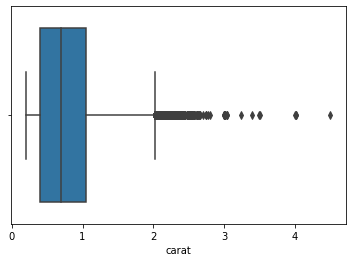

depth


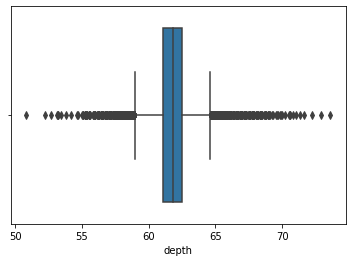

table


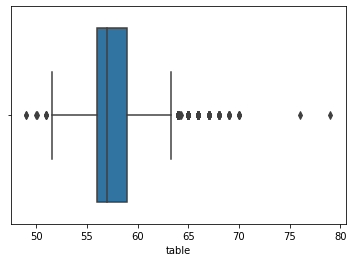

price


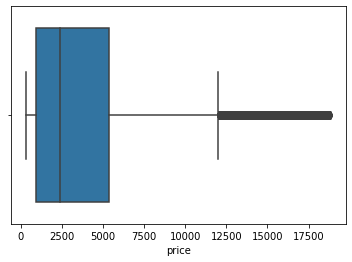

In [151]:
#Check outliers

for col in data.columns :
    if data[col].dtype != "object" :
        print(col)
        sns.boxplot(data[col])
        plt.show()

In [152]:
#Treating outliers

def find_whiskers(col):
    sorted(col)
    Q1 , Q3 = col.quantile([0.25,0.75])
    IQR = Q3-Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range , upper_range

for col in ['carat', 'depth', 'table', 'price']:
    lwrange , uprange = find_whiskers(data[col])
    data[col] = np.where(data[col] > uprange , uprange , data[col])
    data[col] = np.where(data[col] < lwrange , lwrange , data[col])

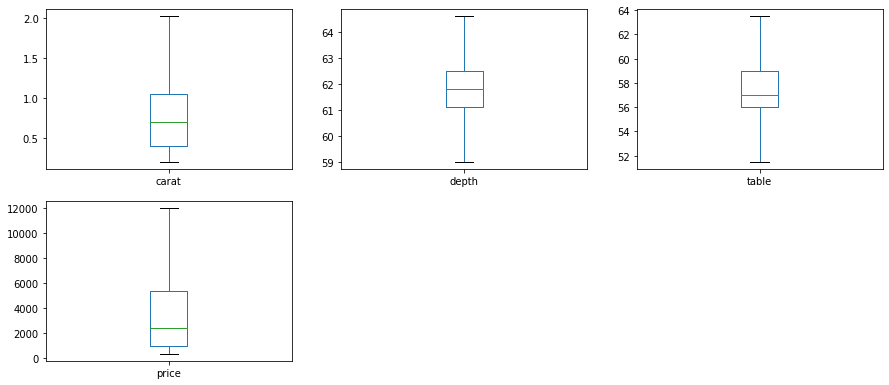

In [153]:
data.plot(kind='box',figsize=(15,10),subplots=True,layout=(3,3))
plt.show()

In [154]:
#Value counts 
for col in data.columns :
    if data[col].dtype == 'object' :
        print(col)
        print(data[col].value_counts())
        print("-------------")

cut
Ideal        10686
Premium       6866
Very Good     6011
Good          2428
Fair           780
Name: cut, dtype: int64
-------------
color
G    5615
E    4873
F    4694
H    4075
D    3314
I    2762
J    1438
Name: color, dtype: int64
-------------
clarity
SI1     6540
VS2     6023
SI2     4562
VS1     4065
VVS2    2514
VVS1    1823
IF       880
I1       364
Name: clarity, dtype: int64
-------------


<Figure size 1440x720 with 0 Axes>

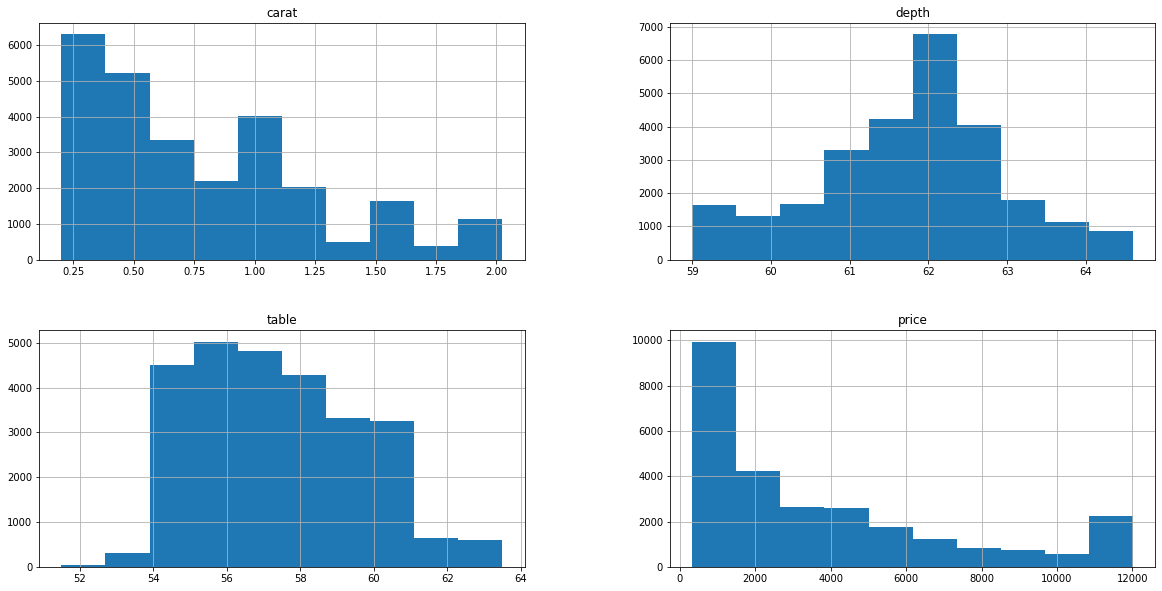

In [155]:
#Univariate Analysis
plt.figure(figsize = (20,10))
data[['carat', 'depth', 'table', 'price']].hist(figsize=(20,10));

<AxesSubplot:xlabel='color', ylabel='count'>

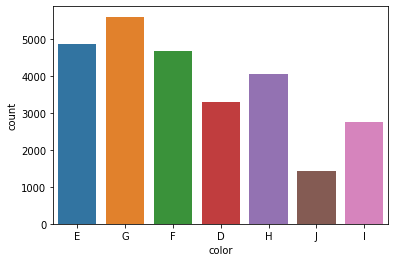

In [156]:
#Categorical variables

sns.countplot(data['color'])


<AxesSubplot:xlabel='cut', ylabel='count'>

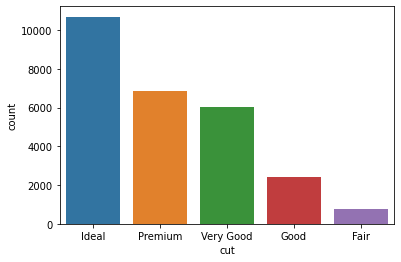

In [157]:
sns.countplot(data['cut'])


<AxesSubplot:xlabel='clarity', ylabel='count'>

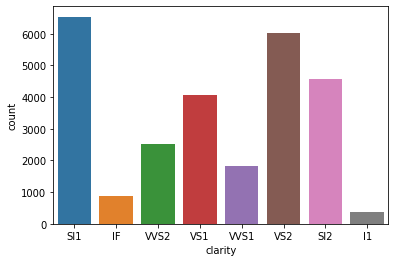

In [158]:
sns.countplot(data['clarity'])


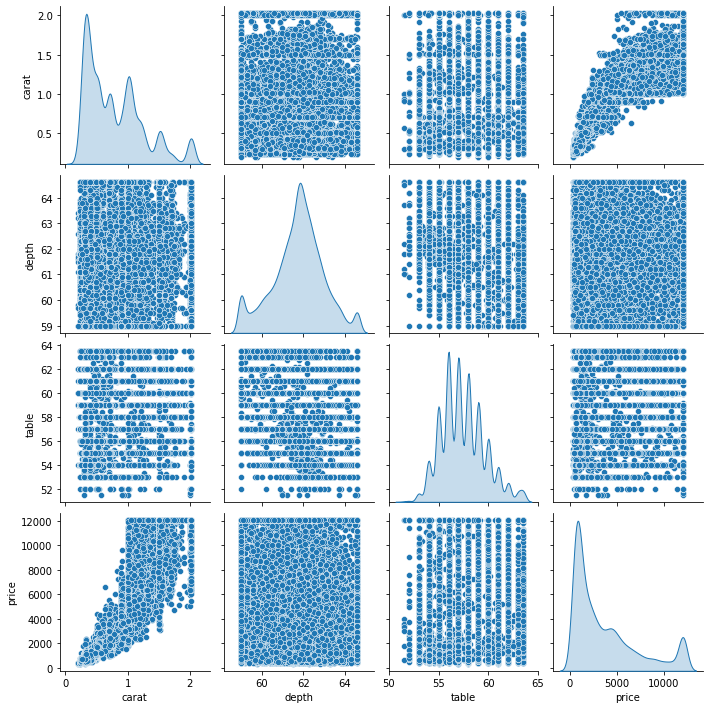

In [159]:
#Bivariate Analysis

sns.pairplot(data, diag_kind='kde')  
plt.show()

In [160]:
corr = data.corr()
corr

,carat,depth,table,price
carat,1.000000,0.030785,0.184933,0.936489
depth,0.030785,1.000000,-0.289683,-0.000031
table,0.184933,-0.289683,1.000000,0.135702
price,0.936489,-0.000031,0.135702,1.000000


<AxesSubplot:>

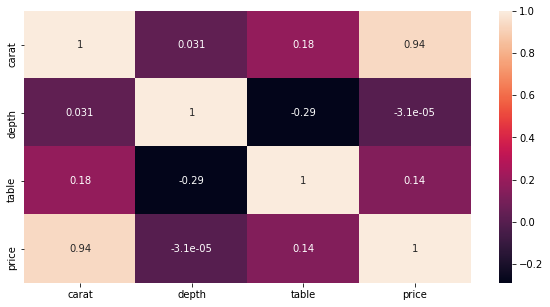

In [161]:
plt.figure(figsize = (10,5))
sns.heatmap(corr,annot=True)

In [162]:
input_classes = {"cut":{'Fair':1 , 'Good':2 , 'Very Good' : 3, 'Premium':4 , 'Ideal' : 5}}

In [163]:
data.replace(input_classes,inplace=True)
data.head()

,carat,cut,color,clarity,depth,table,price
0,0.30,5,E,SI1,62.1,58.0,499.0
1,0.33,4,G,IF,60.8,58.0,984.0
2,0.90,3,E,VVS2,62.2,60.0,6289.0
3,0.42,5,F,VS1,61.6,56.0,1082.0
4,0.31,5,F,VVS1,60.4,59.0,779.0


In [164]:
input_classes = {"color":{'D':1 , 'E':2 , 'F' : 3, 'G':4 , 'H' : 5, 'I' : 5, 'J' : 5}}

In [165]:
data.replace(input_classes,inplace=True)
data.head()

,carat,cut,color,clarity,depth,table,price
0,0.30,5,2,SI1,62.1,58.0,499.0
1,0.33,4,4,IF,60.8,58.0,984.0
2,0.90,3,2,VVS2,62.2,60.0,6289.0
3,0.42,5,3,VS1,61.6,56.0,1082.0
4,0.31,5,3,VVS1,60.4,59.0,779.0


In [166]:
input_classes = {"clarity":{'IF':1, 'VVS1':2, 'VVS2':3, 'VS1':4, 'VS2':5, 'SI1':6, 'SI2':7, 'I1':8}}

In [167]:
data.replace(input_classes,inplace=True)
data.head()

,carat,cut,color,clarity,depth,table,price
0,0.30,5,2,6,62.1,58.0,499.0
1,0.33,4,4,1,60.8,58.0,984.0
2,0.90,3,2,3,62.2,60.0,6289.0
3,0.42,5,3,4,61.6,56.0,1082.0
4,0.31,5,3,2,60.4,59.0,779.0


In [168]:
from scipy.stats import zscore
data_new = data.apply(zscore)
data_new.head()

,carat,cut,color,clarity,depth,table,price
0,-1.073058,0.982659,-0.997628,0.637295,0.287459,0.258204,-0.936147
1,-1.008148,0.084572,0.429245,-2.398798,-0.777273,0.258204,-0.796753
2,0.225127,-0.813515,-0.997628,-1.184361,0.369361,1.184829,0.727961
3,-0.813421,0.982659,-0.284192,-0.577142,-0.122054,-0.668420,-0.768586
4,-1.051421,0.982659,-0.284192,-1.791580,-1.104883,0.721517,-0.855672


In [169]:
#Train Test split

x = data_new.drop('price',axis = 1)

# Copy target into the y dataframe. 
y = data_new.pop('price')

In [170]:
x.head()

,carat,cut,color,clarity,depth,table
0,-1.073058,0.982659,-0.997628,0.637295,0.287459,0.258204
1,-1.008148,0.084572,0.429245,-2.398798,-0.777273,0.258204
2,0.225127,-0.813515,-0.997628,-1.184361,0.369361,1.184829
3,-0.813421,0.982659,-0.284192,-0.577142,-0.122054,-0.668420
4,-1.051421,0.982659,-0.284192,-1.791580,-1.104883,0.721517


In [171]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30 , random_state=1)

In [172]:
#LinearRegression function and find the bestfit model on training data

regression_model = LinearRegression()
regression_model.fit(x_train, y_train)

LinearRegression()

In [173]:
# the coefficients for each of the independent attributes

for idx, col_name in enumerate(x_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[idx]))

The coefficient for carat is 1.0495798718828402
The coefficient for cut is 0.034647695981798926
The coefficient for color is -0.11541801243469577
The coefficient for clarity is -0.21194885875864872
The coefficient for depth is -0.009967133758255609
The coefficient for table is -0.012473249939019042


In [174]:
#check the intercept for the model

intercept = regression_model.intercept_

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -7.640063035874738e-05


In [175]:
# R square on training data
regression_model.score(x_train, y_train)

0.9267507660474659

In [176]:
# R square on testing data
regression_model.score(x_test, y_test)

0.9256625149886726

In [177]:
#RMSE on Training data
predicted_train=regression_model.fit(x_train, y_train).predict(x_train)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

0.2710629878500264

In [178]:
#RMSE on Testing data
predicted_test=regression_model.fit(x_train, y_train).predict(x_test)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))

0.27166632333949225

Linear Regression using statsmodels

In [179]:
data_train = pd.concat([x_train, y_train], axis=1)
data_train.head()


,carat,cut,color,clarity,depth,table,price
9960,-0.683602,-2.609688,-0.997628,0.030076,2.335020,-1.595045,-0.730361
9876,1.544948,0.084572,-0.997628,1.244514,0.778873,0.258204,0.743193
5858,-0.856693,0.084572,-0.284192,0.637295,0.942678,0.258204,-0.826069
16420,-0.986512,0.982659,1.142682,-1.184361,-0.531566,-0.668420,-0.834691
21378,0.225127,-0.813515,0.429245,1.244514,-1.350590,1.184829,-0.184568


In [181]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= 'price ~ carat+cut+clarity+depth+table', data = data_train).fit()
lm1.params

Intercept    0.000034
carat        1.012466
cut          0.033229
clarity     -0.193529
depth       -0.015762
table       -0.012453
dtype: float64

In [182]:
print(lm1.summary())  #Inferential statistics

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                 4.018e+04
Date:                Sun, 06 Dec 2020   Prob (F-statistic):               0.00
Time:                        22:32:24   Log-Likelihood:                -3553.2
No. Observations:               18739   AIC:                             7118.
Df Residuals:                   18733   BIC:                             7165.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.397e-05      0.002      0.016      0.9

In [183]:
# Calculate MSE
mse = np.mean((lm1.predict(data_train.drop('price',axis=1))-data_train['price'])**2)

In [184]:
#Root Mean Squared Error - RMSE
np.sqrt(mse)

0.29249050207474336

In [185]:
# Model score - R2 or coeff of determinant
# R^2=1–RSS / TSS

regression_model.score(x_test, y_test)

0.9256625149886726

In [186]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [187]:
vif = [variance_inflation_factor(x.values, ix) for ix in range(x.shape[1])] 

In [190]:
i=0
for column in x.columns:
    if i < 11:
        print (column ,"--->",  vif[i])
        i = i+1

carat ---> 1.2822159939702893
cut ---> 1.4915904035963454
color ---> 1.1020010636387867
clarity ---> 1.2012771184065307
depth ---> 1.3228997907234574
table ---> 1.577822870641595


In [191]:
for i,j in np.array(lm1.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(0.0) * Intercept + (1.01) * carat + (0.03) * cut + (-0.19) * clarity + (-0.02) * depth + (-0.01) * table + 

Problem 2: Logistic Regression and LDA


You are hired by a tour and travel agency which deals in selling holiday packages. You are provided details of 872 employees of a company. Among these employees, some opted for the package and some didn't. You have to help the company in predicting whether an employee will opt for the package or not on the basis of the information given in the data set. Also, find out the important factors on the basis of which the company will focus on particular employees to sell their packages.

In [699]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt   
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

In [700]:
df = pd.read_csv("Holiday_Package.csv")
df.head()

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,1,no,48412,30,8,1,1,no
1,2,yes,37207,45,8,0,1,no
2,3,no,58022,46,9,0,0,no
3,4,no,66503,31,11,2,0,no
4,5,no,66734,44,12,0,2,no


In [701]:
df = df.drop('Unnamed: 0',axis = 1)

In [702]:
df.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,no,48412,30,8,1,1,no
1,yes,37207,45,8,0,1,no
2,no,58022,46,9,0,0,no
3,no,66503,31,11,2,0,no
4,no,66734,44,12,0,2,no


In [703]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Holliday_Package   872 non-null    object
 1   Salary             872 non-null    int64 
 2   age                872 non-null    int64 
 3   educ               872 non-null    int64 
 4   no_young_children  872 non-null    int64 
 5   no_older_children  872 non-null    int64 
 6   foreign            872 non-null    object
dtypes: int64(5), object(2)
memory usage: 47.8+ KB


In [704]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Salary,872.0,47729.172018,23418.668531,1322.0,35324.0,41903.5,53469.5,236961.0
age,872.0,39.955275,10.551675,20.0,32.0,39.0,48.0,62.0
educ,872.0,9.307339,3.036259,1.0,8.0,9.0,12.0,21.0
no_young_children,872.0,0.311927,0.612870,0.0,0.0,0.0,0.0,3.0
no_older_children,872.0,0.982798,1.086786,0.0,0.0,1.0,2.0,6.0


In [705]:
df.duplicated().sum()

0

In [706]:
df.isna().sum()

Holliday_Package     0
Salary               0
age                  0
educ                 0
no_young_children    0
no_older_children    0
foreign              0
dtype: int64

In [707]:
data.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
dtype: int64

In [708]:
df.shape

(872, 7)

In [709]:
df['Holliday_Package'].value_counts()


no     471
yes    401
Name: Holliday_Package, dtype: int64

In [710]:
df['foreign'].value_counts()

no     656
yes    216
Name: foreign, dtype: int64

In [711]:
df.groupby('Holliday_Package').mean()

,Salary,age,educ,no_young_children,no_older_children
Holliday_Package,,,,,
no,51739.443737,40.853503,9.594480,0.409766,0.902335
yes,43018.852868,38.900249,8.970075,0.197007,1.077307


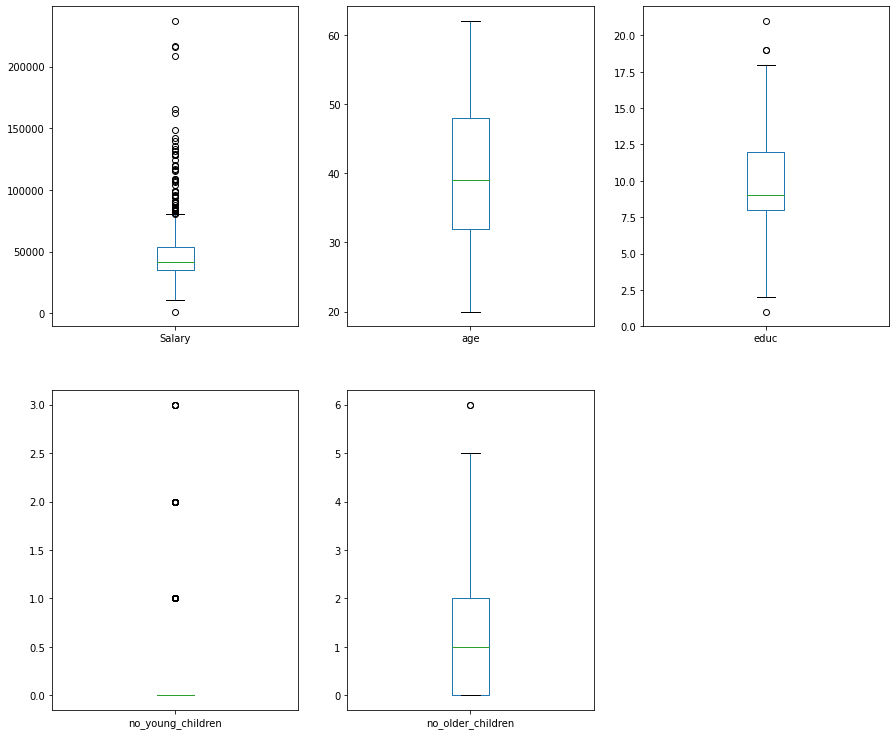

In [712]:
df.plot(kind='box',figsize=(15,20),subplots=True,layout=(3,3))
plt.show()

In [713]:
#Treating outliers

def find_whiskers(col):
    sorted(col)
    Q1 , Q3 = col.quantile([0.25,0.75])
    IQR = Q3-Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range , upper_range

for col in ['Salary', 'age', 'educ', 'no_young_children', 'no_older_children']:
    lwrange , uprange = find_whiskers(df[col])
    df[col] = np.where(df[col] > uprange , uprange , df[col])
    df[col] = np.where(df[col] < lwrange , lwrange , df[col])

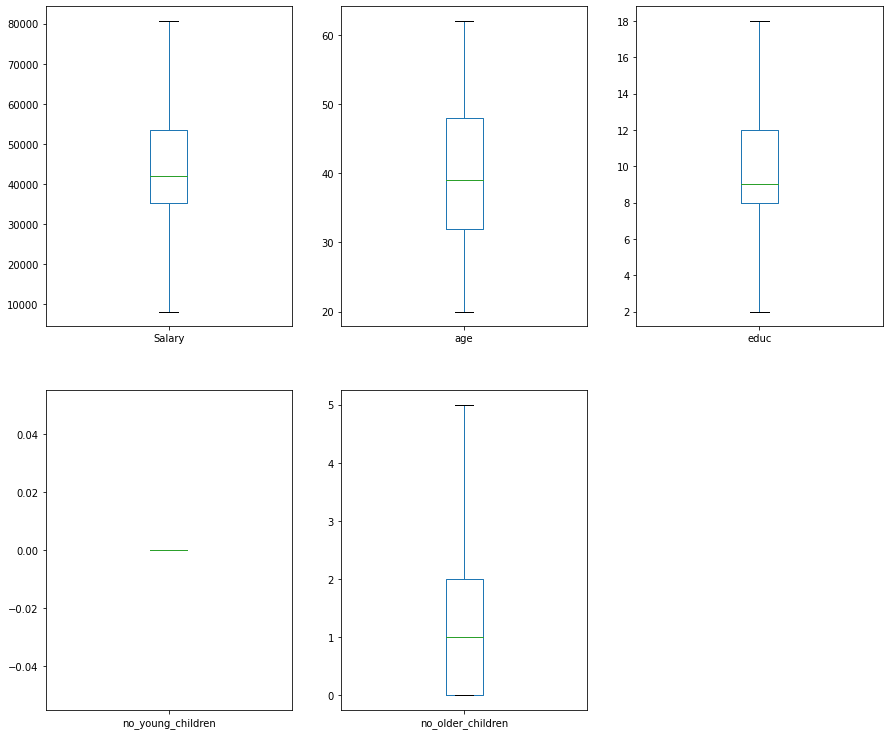

In [714]:
df.plot(kind='box',figsize=(15,20),subplots=True,layout=(3,3))
plt.show()

array([[<AxesSubplot:title={'center':'Salary'}>,
        <AxesSubplot:title={'center':'age'}>],
       [<AxesSubplot:title={'center':'educ'}>,
        <AxesSubplot:title={'center':'no_young_children'}>],
       [<AxesSubplot:title={'center':'no_older_children'}>,
        <AxesSubplot:>]], dtype=object)

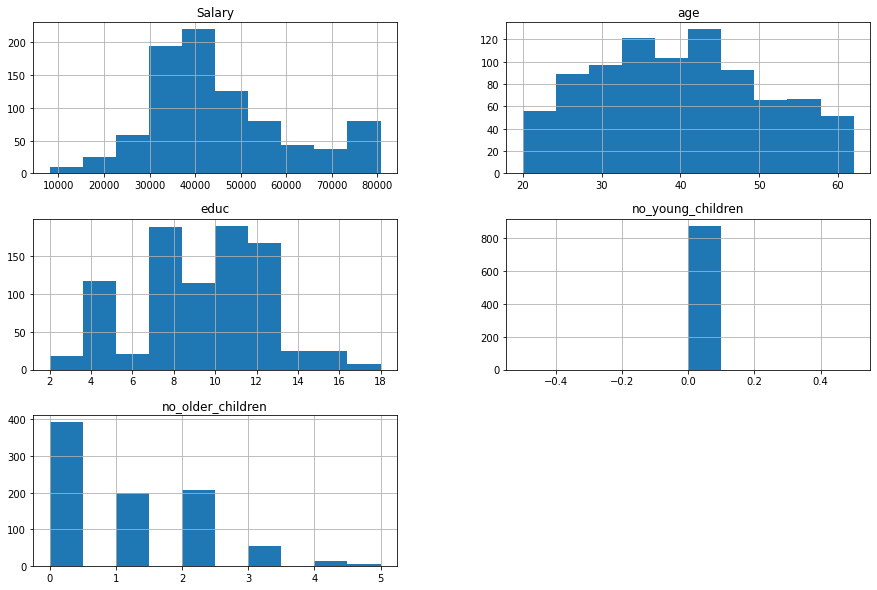

In [715]:
df.hist(figsize=(15,10))

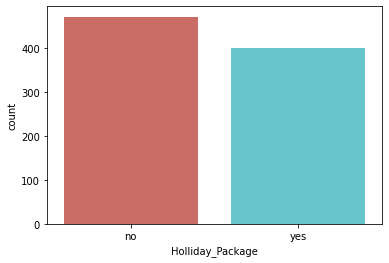

In [716]:
sns.countplot(x='Holliday_Package',data=df, palette='hls')
plt.show()

In [717]:
df.groupby('foreign').mean()


,Salary,age,educ,no_young_children,no_older_children
foreign,,,,,
no,47763.692073,40.603659,10.030488,0.0,0.966463
yes,39062.443287,37.986111,7.092593,0.0,1.023148


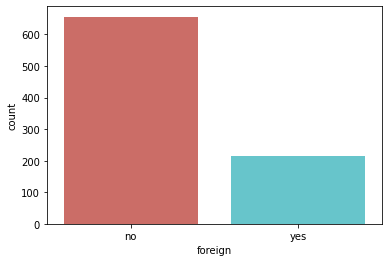

In [718]:
sns.countplot(x='foreign',data=df, palette='hls')
plt.show()

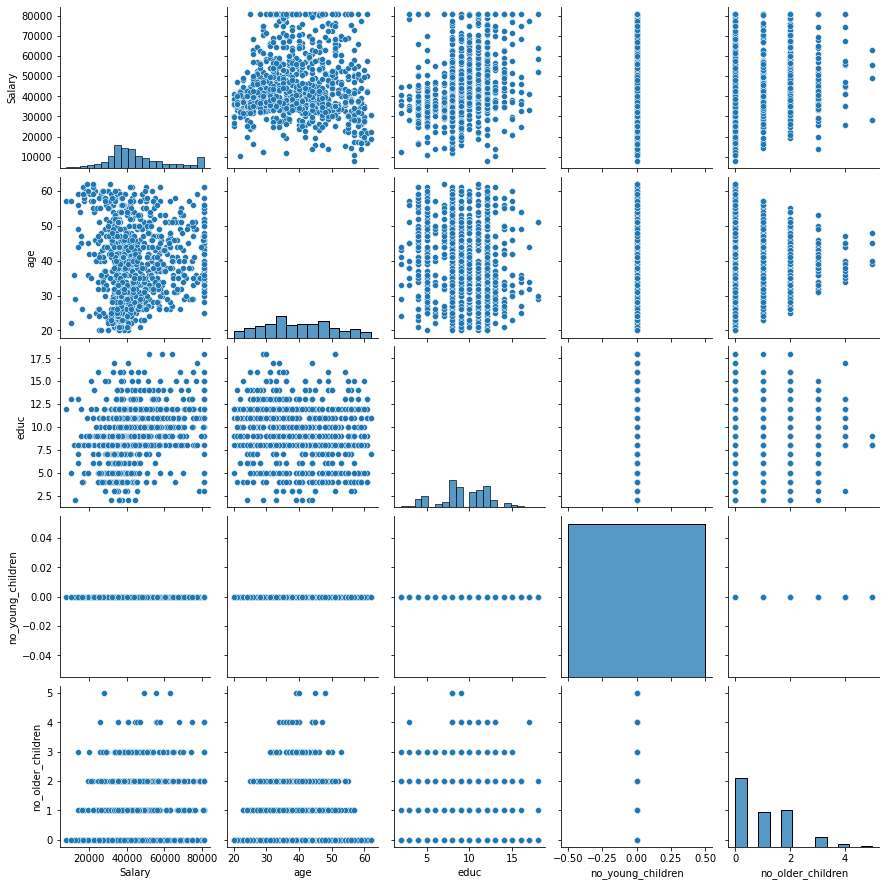

In [719]:
sns.pairplot(df,diag_kind='hist')

In [720]:
corr = df.corr()
corr

,Salary,age,educ,no_young_children,no_older_children
Salary,1.000000,0.047029,0.352913,NaN,0.124030
age,0.047029,1.000000,-0.149682,NaN,-0.117754
educ,0.352913,-0.149682,1.000000,NaN,-0.035656
no_young_children,NaN,NaN,NaN,NaN,NaN
no_older_children,0.124030,-0.117754,-0.035656,NaN,1.000000


<AxesSubplot:>

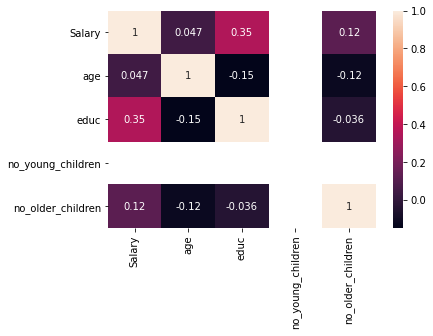

In [721]:
sns.heatmap(corr, annot=True)

In [722]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

HOLLIDAY_PACKAGE :  2
yes    401
no     471
Name: Holliday_Package, dtype: int64


FOREIGN :  2
yes    216
no     656
Name: foreign, dtype: int64




In [723]:
# Converting Categorical to Numerical Variable
for feature in df.columns: 
    if df[feature].dtype == 'object':
        df[feature] = pd.Categorical(df[feature]).codes 

In [724]:
df.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,0,48412.0,30.0,8.0,0.0,1.0,0
1,1,37207.0,45.0,8.0,0.0,1.0,0
2,0,58022.0,46.0,9.0,0.0,0.0,0
3,0,66503.0,31.0,11.0,0.0,0.0,0
4,0,66734.0,44.0,12.0,0.0,2.0,0


In [725]:
df.Holliday_Package.value_counts(normalize=True)

0    0.540138
1    0.459862
Name: Holliday_Package, dtype: float64

In [726]:
x = df.drop("Holliday_Package", axis =1)
y = df.pop("Holliday_Package")

In [728]:
# Split X and y into training and test set in 70:30 ratio
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30 , random_state=1,stratify=y)

In [732]:
y_train.value_counts(normalize = True)

0    0.539344
1    0.460656
Name: Holliday_Package, dtype: float64

In [733]:
y_test.value_counts(normalize = True)

0    0.541985
1    0.458015
Name: Holliday_Package, dtype: float64

In [735]:
# Fit the Logistic Regression model
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [736]:
#Predicting on Training and Test dataset
ytrain_predict = model.predict(x_train)
ytest_predict = model.predict(x_test)

In [737]:
#Getting the Predicted Classes and Probs
ytest_predict_prob=model.predict_proba(x_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.532879,0.467121
1,0.553427,0.446573
2,0.537220,0.462780
3,0.547145,0.452855
4,0.568693,0.431307


In [739]:
#Model Evaluation
# Accuracy - Training Data
model.score(x_train, y_train)

0.5393442622950819

AUC: 0.593


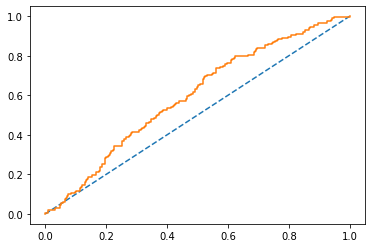

In [740]:
#AUC and ROC for the training data
# predict probabilities
probs = model.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [741]:
# Accuracy - Test Data
model.score(x_test, y_test)

0.5419847328244275

AUC: 0.593


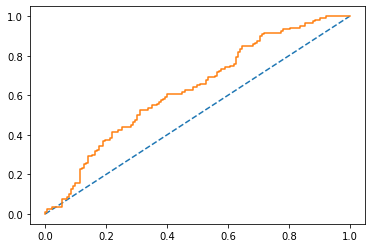

In [742]:
#AUC and ROC for the test data
# predict probabilities
probs = model.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [743]:
#Confusion Matrix for the training data
confusion_matrix(y_train, ytrain_predict)

array([[329,   0],
       [281,   0]], dtype=int64)

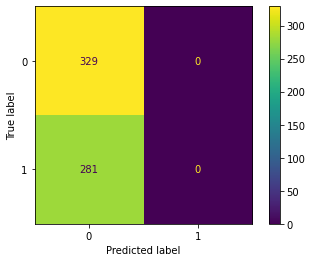

In [745]:
plot_confusion_matrix(model,x_train,y_train);

In [746]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.54      1.00      0.70       329
           1       0.00      0.00      0.00       281

    accuracy                           0.54       610
   macro avg       0.27      0.50      0.35       610
weighted avg       0.29      0.54      0.38       610



In [747]:
#Confusion Matrix for test data
confusion_matrix(y_test, ytest_predict)

array([[142,   0],
       [120,   0]], dtype=int64)

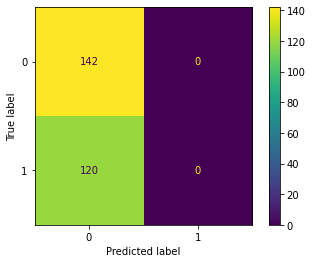

In [749]:
plot_confusion_matrix(model,x_test,y_test);

In [750]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.54      1.00      0.70       142
           1       0.00      0.00      0.00       120

    accuracy                           0.54       262
   macro avg       0.27      0.50      0.35       262
weighted avg       0.29      0.54      0.38       262



Applying GridSearchCV for Logistic Regression

In [774]:
grid={'penalty':['11','l2','none'],
      'solver':['newton_sg','sag','lbfgs'],
      'tol':[0.0001,0.00001],
      'max_iter':[1000,10000]}

In [775]:
grid_search = GridSearchCV(estimator = LogisticRegression(), param_grid = grid, cv = 5, verbose = 1, scoring='accuracy')

In [776]:
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:   29.3s finished


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'max_iter': [1000, 10000],
                         'penalty': ['11', 'l2', 'none'],
                         'solver': ['newton_sg', 'sag', 'lbfgs'],
                         'tol': [0.0001, 1e-05]},
             scoring='accuracy', verbose=1)

In [777]:
print(grid_search.best_params_,)


{'max_iter': 1000, 'penalty': 'l2', 'solver': 'sag', 'tol': 0.0001}


In [778]:
print(grid_search.best_estimator_)

LogisticRegression(max_iter=1000, solver='sag')


In [779]:
best_model = grid_search.best_estimator_

In [780]:
# Prediction on the training set

ytrain_predict = best_model.predict(x_train)
ytest_predict = best_model.predict(x_test)

In [781]:
## Getting the probabilities on the test set

ytest_predict_prob=best_model.predict_proba(x_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.531982,0.468018
1,0.553674,0.446326
2,0.536389,0.463611
3,0.547003,0.452997
4,0.568694,0.431306


              precision    recall  f1-score   support

           0       0.54      1.00      0.70       329
           1       0.00      0.00      0.00       281

    accuracy                           0.54       610
   macro avg       0.27      0.50      0.35       610
weighted avg       0.29      0.54      0.38       610
 



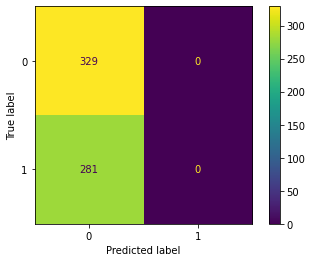

In [782]:
## Confusion matrix on the training data

plot_confusion_matrix(best_model,x_train,y_train)
print(classification_report(y_train, ytrain_predict),'\n');

              precision    recall  f1-score   support

           0       0.54      1.00      0.70       142
           1       0.00      0.00      0.00       120

    accuracy                           0.54       262
   macro avg       0.27      0.50      0.35       262
weighted avg       0.29      0.54      0.38       262
 



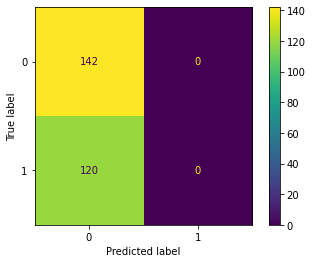

In [773]:
## Confusion matrix on the test data

plot_confusion_matrix(best_model,x_test,y_test)
print(classification_report(y_test, ytest_predict),'\n');

Linear Discriminant Analysis

In [824]:

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import scale

In [827]:
clf = LinearDiscriminantAnalysis()
model=clf.fit(x_train,y_train)

In [829]:
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = model.predict(x_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = model.predict(x_test)

In [830]:
#Accuracy of Training Data
model.score(x_train,y_train)

0.6327868852459017

In [831]:
##Accuracy of Training Data
model.score(x_test,y_test)

0.6564885496183206

In [833]:
#Confusion matrix on train data
confusion_matrix(y_train, pred_class_train)

array([[263,  66],
       [158, 123]], dtype=int64)

In [834]:
#Classification matrix on train data
print(classification_report(y_train, pred_class_train))

              precision    recall  f1-score   support

           0       0.62      0.80      0.70       329
           1       0.65      0.44      0.52       281

    accuracy                           0.63       610
   macro avg       0.64      0.62      0.61       610
weighted avg       0.64      0.63      0.62       610



In [836]:
#Confusion matrix on test data
confusion_matrix(y_test,pred_class_test)

array([[118,  24],
       [ 66,  54]], dtype=int64)

In [837]:
#Classification matrix on train data
print(classification_report(y_test,pred_class_test))

              precision    recall  f1-score   support

           0       0.64      0.83      0.72       142
           1       0.69      0.45      0.55       120

    accuracy                           0.66       262
   macro avg       0.67      0.64      0.63       262
weighted avg       0.66      0.66      0.64       262



In [839]:
#Probability prediction for the training and test data
# Training Data Probability Prediction
pred_prob_train = model.predict_proba(x_train)

# Test Data Probability Prediction
pred_prob_test = model.predict_proba(x_test)

In [840]:
pred_prob_train[:,1]

array([0.73614833, 0.64936462, 0.45296681, 0.67842845, 0.66903745,
       0.3774365 , 0.32146187, 0.43700845, 0.3601507 , 0.62535644,
       0.23288822, 0.26149271, 0.44813877, 0.48143931, 0.29614015,
       0.46145671, 0.43653859, 0.30536315, 0.54175682, 0.66481517,
       0.49405489, 0.31531235, 0.75146336, 0.43228357, 0.31741838,
       0.74742033, 0.24732567, 0.7256214 , 0.49778025, 0.4701221 ,
       0.2458476 , 0.59535195, 0.39263888, 0.38905706, 0.34870239,
       0.34966751, 0.47524197, 0.50165433, 0.47132887, 0.20930823,
       0.22990207, 0.67104116, 0.40365647, 0.62197077, 0.64959972,
       0.34741408, 0.34082919, 0.73390632, 0.42023771, 0.62369484,
       0.57834131, 0.3978419 , 0.49066256, 0.40405466, 0.22000295,
       0.41866697, 0.25849518, 0.5276083 , 0.6674488 , 0.40702718,
       0.59934243, 0.26473066, 0.43421298, 0.34478906, 0.5114521 ,
       0.53275226, 0.41995444, 0.49835656, 0.40640466, 0.33834489,
       0.25698034, 0.65937394, 0.48721781, 0.25848244, 0.71797

AUC for the Training Data: 0.661
AUC for the Test Data: 0.675


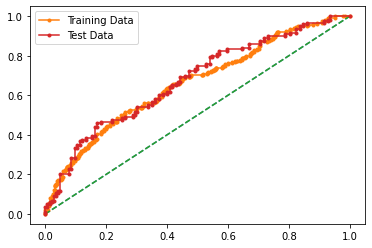

In [841]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()